# Assignment #5 - Deep Learning (Extra Credits)

## Tanvi Rasam


# I. Overview

The aim of this assignment is to apply Deep Learning on the classification dataset used in assignment #0. In assignment-3 we used Neural network for this classifiction dataset. A deep neural network is also a neural network with a certain level of complexity, a neural network with more than two layers. Deep neural networks use sophisticated mathematical modeling to process data in complex ways. This means the accuracy should be better than that achieved by the Neural Networks. But this depends on a lot of factors like - no. of hidden layers, activation function, optimizer chosen and also the no. of nodes. If this is not done properly the model may overfit. 
To implement Deep Neural Networks I have used Keras. As, the accuracy of prediction highly depends upon the structure and parameters choosen, in this assignment the dataset is modeled on 3 different sequential structures to find out which works best.



# II Data

1.1 Description of the Dataset

Census is an enumeration of the members of a given population, which takes place once a decade in the entire country. The census data is very valuable since it provides critical insights in econimical,social, housing and education domain. Adult dataset is an aggregation of different country's censuses.This dataset is derived from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). It is a multivariate dataset containing 32560 instances and 15 attributes. Dataset is constructed by satisfyting the following condition : Age> 16, Adjusted-Gross-Income> 100, Final weight (fnlwgt)> 1 and hrs/week > 0.
 
Goal:  To predict whether the income would be >$50K/yr or <=$50K/yr 

1.2 Description of the Data

 1.2.1 Categorical Attributes
     
     workclass: which sector the individual is working
                values:Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
     education: Individual's highest level of education
                values:Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters ,1st-4th, 10th, Doctorate, 5th-6th, Preschool
     marital-status: Individual marital status
                     values:Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent,  Married-AF-spouse.
     occupation: What job individual does
                 values:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,  Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,                           Armed-Forces.              
     relationship: Individual's relation in a family
                   values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
     race: Individual's Race 
           values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
     sex: Gender
          values: Female, Male.
     native-country: where individual belongs to 
                     values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,   Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,                                Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

 1.2.2 Continuous Attributes

    age: Individual's age
         value :continuous.
    education-num: Individual's number of years of education
                   value: continuous
    fnlwgt: final weight ie. the number of units in the target population that the responding unit represents
            value :continuous           
    capital-gain: Individual's gain in income through other investments
                  values: continuous
    capital-loss: Individual's loss in income through other investments
                  values: continuous
    hours-per-week: hrs worked by individual per week
                    values: continuous.


1.3 Source: UCI Machine Learning Repository :https://archive.ics.uci.edu/ml/datasets/Adult

Reading the Data 

2.1 Importing the required packages for the Assignment

In [211]:
import time
start_time = time.time()

In [212]:
import pandas as pd # storing and mnipulating the dataset
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import warnings  
import pylab as pl
import pdb
warnings.filterwarnings("ignore") # to not display any warnings generated 
import numpy as np # for array computations
from sklearn.preprocessing import StandardScaler

In [213]:
import keras


In [214]:
df_assg1= pd.read_csv('adult.csv') #df_assg1 holds the dataset
df_assg1.head() #displacing the first 5 records

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [215]:
df_assg1.columns= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income-per-year']
df_assg1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [216]:
unique_attributes, counts = np.unique(df_assg1['workclass'], return_counts = True) # collecting unique attributes and their frequency
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['workclass'][df_assg1['workclass'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['occupation'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['occupation'][df_assg1['occupation'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['education'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['education'][df_assg1['education'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['marital-status'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['marital-status'][df_assg1['marital-status'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['relationship'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['relationship'][df_assg1['relationship'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['age'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['age'][df_assg1['age'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['race'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['race'][df_assg1['race'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['sex'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['sex'][df_assg1['sex'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['hours-per-week'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['hours-per-week'][df_assg1['hours-per-week'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['native-country'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['native-country'][df_assg1['native-country'] == ' ?'] = most_freq_attribute

unique_attributes, counts = np.unique(df_assg1['income-per-year'], return_counts = True)
most_freq_attribute = unique_attributes[np.argmax(counts, axis = 0)] # calculating the maximum ie. frequent one
df_assg1['income-per-year'][df_assg1['income-per-year'] == ' ?'] = most_freq_attribute







In [217]:
df_assg1['income-per-year'].replace(' >50K' ,1, inplace=True )
df_assg1['income-per-year'].replace(' <=50K' ,0, inplace=True )
df_assg1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


# Visualization

### 4.1 Percentange of Labels present

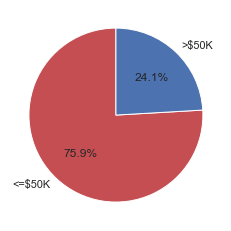

In [218]:

# Plot 1
label_count = [len(df_assg1[df_assg1['income-per-year'] == 0]),len(df_assg1[df_assg1['income-per-year'] == 1])]
label = ['<=$50K', '>$50K']
colors = ['r', 'b']
plt.pie(label_count, labels=label, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

Observation 1: Most of the records are in <=$50K Category ( around 3/4th)

4.2 Observing the covariance Matrix

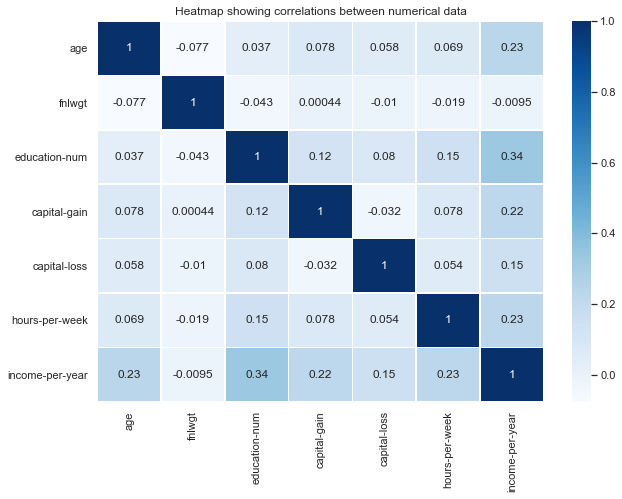

In [219]:
plt.figure(figsize=(10,7))  
sns.heatmap(df_assg1.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

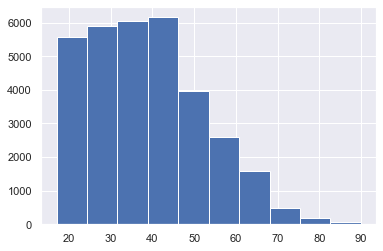

In [220]:
# Plot 2: For Age
df_assg1['age'].hist()
plt.show()

Observation 2:
1. Most of the population is concentrated 25-45 age group which means very less older people are there earning stage 
2. Minimum seems to be 17 (staisfying the dataset condition) and maximum to be 90

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


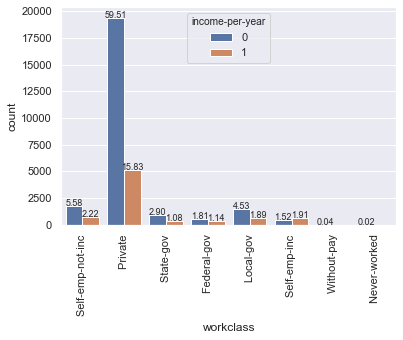

In [221]:
#Plot 3:  Salaries of different workclass
sns.set(style="darkgrid")
ax = sns.countplot(x="workclass",hue="income-per-year", data=df_assg1)
total=float(len(df_assg1))
for p in ax.patches:
    height = p.get_height()
    if height < 0 :
        height = 0;
    ax.text(float(p.get_x()+p.get_width()/2), 
               float(height),
            '{:1.2f}'.format((height/total)*100),
            ha="center",fontsize=9) 
plt.xticks(rotation=90)
plt.show()

Observation 3: 
1. Around 75% of the population is working in the private sector
2. Sel- employed is the only sector where there are more people with >$50K than <=$50K


#Plot 4
ax = sns.countplot(x="education-num",hue="income-per-year", data=df_assg1)
plt.xticks(rotation=90)
plt.show()

Observation 4:
1. As number of years of education increases the chances of getting income >$50K increases

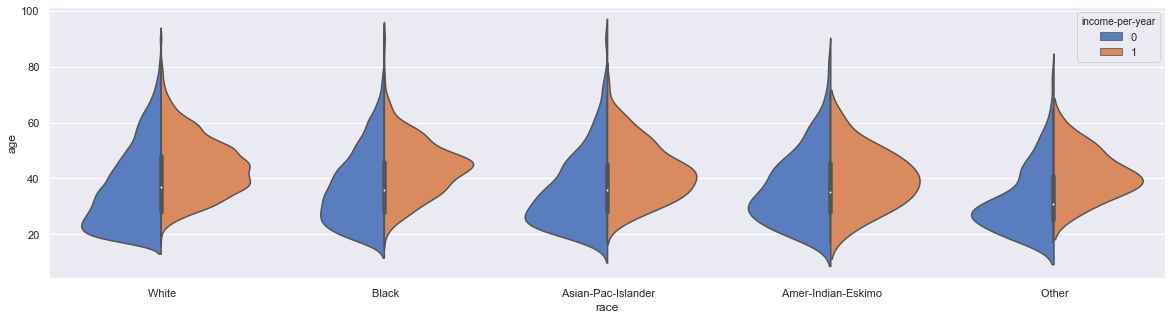

In [222]:
# Plot 5

from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="income-per-year",
                    data=df_assg1, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Observation 8:
1. Approx 40 is the age in all races where maximum people are earning >$50K
2.Early 20s to 30 maximum people are in <=$50K income category
3.For Asisn-Pac-Islander and Amer-India-Eskimo race the number of people in >$50K and <=$50K seems to be balanced

# III Methods

# General Definitions:

### Keras: Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks

### Sequential model: The Sequential model is a linear stack of layers.A Sequential model can be created by passing a list of layer instances to the constructor

### Activation function: Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

### Loss: This is the objective that the model will try to minimize.. Loss functions map a set of parameter values for the network onto a scalar value that indicates how well those parameter accomplish the task the network is intended to do.

### optimizer: Optimization algorithms helps us to minimize (or maximize) an Objective function (another name for Error function) E(x) which is simply a mathematical function dependent on the Model’s internal learnable parameters which are used in computing the target values(Y) from the set of predictors(X) used in the model.

### metrics: A metric is a function that is used to judge the performance of your model

### Epoch: an arbitrary cutoff, generally defined as “one pass over the entire dataset”, used to separate training into distinct phases, which is useful for logging and periodic evaluation.


In [223]:
y=df_assg1[['income-per-year']]
df_assg1.drop(['income-per-year'],axis=1,inplace=True)



In [224]:
df_assg1.drop(['fnlwgt'],axis=1,inplace=True)

In [225]:
df_assg1=pd.get_dummies(df_assg1)

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_assg1, y, test_size=0.33, random_state=42)

In [227]:
X_train.shape

(21815, 104)

In [228]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(X_train)
X_train = s.transform(X_train)
s.fit(X_test)
X_test = s.transform(X_test)


In [229]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


## Network Architechture - Explanation, Implementation and Results

# Summary of Choice of Networks:

For Model 1 , I have created a basic sequential network, keeping the standard parameters used for a binary classification problem. The activation function used is 'relu' as,ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.

For model 2, I have made use of regularization using the dropout which is set to 0.5. This will ensure that overfitting is avoided.

For model 3, I have tried a different activation function - 'Leaky Relu'. .The non-differentiability at zero problem can be solved by allowing a small value to flow when the input is less than or equal to 0, which thus overcomes the “Dying ReLU” problem. It has proved to give better results for some problems. Also the loss used is mean-square-error.



# Model 1

In [230]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(104, input_dim=104, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [231]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_227 (Dense)            (None, 104)               10920     
_________________________________________________________________
dense_228 (Dense)            (None, 10)                1050      
_________________________________________________________________
dense_229 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_230 (Dense)            (None, 30)                330       
_________________________________________________________________
dense_231 (Dense)            (None, 40)                1240      
_________________________________________________________________
dense_232 (Dense)            (None, 1)                 41        
Total params: 13,691
Trainable params: 13,691
Non-trainable params: 0
_________________________________________________

In [232]:
result=model.fit(X_train,y_train,epochs=5,validation_split=0.33,verbose=0)

# Explanation of code:

In Model 1,I have implemented a sequential model of 6-layers including the I/P and the O/P layer. The activation function used is 'relu' as,ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. That is why it is a good point to consider when we are designing deep neural nets.  The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model needs to receive the input shape. This is specified by input_dim parameter. No. of nodes in each layer are from 10-40. A dense layer is a classic fully connected neural network layer : each input node is connected to each output node.
Finally, I am using the logarithmic loss function (binary_crossentropy) during training, the preferred loss function for binary classification problems. The model also uses the efficient Adam optimization algorithm for gradient descent and accuracy metrics will be collected when the model is trained.  The output layer contains a single neuron in order to make predictions. It uses the sigmoid activation function in order to produce a probability output in the range of 0 to 1 that can easily and automatically be converted to crisp class values. The model is then fitted on to the train data using the fit method, and keeping a validation set of 33% to examine our results. This method returns loss and accuracy over the epochs.



# Results

In [233]:
print("Accuracy of model 1")
print(result.history['accuracy'][-1] * 100)

Accuracy of model 1
86.3095223903656


In [234]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3338827332378599
Test accuracy: 0.8501628637313843


# Plots
## 1. A plot of accuracy on the training and validation datasets over training epochs.
## 2.plot of loss on the training and validation datasets over training epochs.

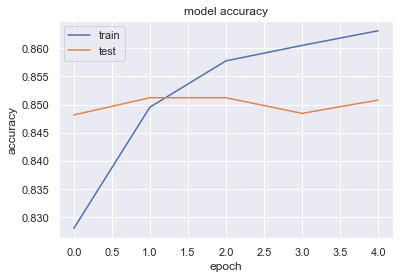

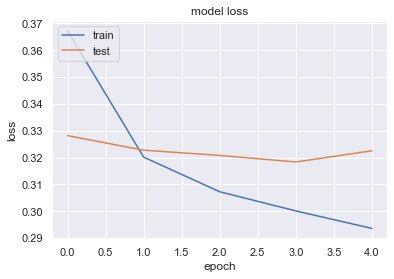

In [235]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Analysis

The plots can provide an indication of useful things about the training of the model, such as:
-It’s speed of convergence over epochs (slope).
-Whether the model may have already converged (plateau of the line).
-Whether the mode may be over-learning the training data (inflection form validation/test line).

From the above plots, it can be observed that after epoch 2, the training accuracy is increasing while the testing/validation goes down, this indicates that the model is overfitting the train data and thus not able to do well on unknown test data.

This is also evident from train and test accuracies calculated above.


# Model 2

In [236]:
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(104, input_dim=104, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

result=model.fit(X_train, y_train,validation_split=0.33,
          epochs=20)


Train on 14616 samples, validate on 7199 samples
Epoch 1/20
14616/14616 [==============================] - 1s 68us/step - loss: 0.4998 - accuracy: 0.7461 - val_loss: 0.4036 - val_accuracy: 0.7639
Epoch 2/20
14616/14616 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.80 - 1s 59us/step - loss: 0.4155 - accuracy: 0.8020 - val_loss: 0.3937 - val_accuracy: 0.8314
Epoch 3/20
14616/14616 [==============================] - 1s 60us/step - loss: 0.3874 - accuracy: 0.8276 - val_loss: 0.3534 - val_accuracy: 0.8418
Epoch 4/20
14616/14616 [==============================] - 1s 61us/step - loss: 0.3753 - accuracy: 0.8380 - val_loss: 0.3712 - val_accuracy: 0.8462
Epoch 5/20
14616/14616 [==============================] - 1s 62us/step - loss: 0.3724 - accuracy: 0.8405 - val_loss: 0.3360 - val_accuracy: 0.8514
Epoch 6/20
14616/14616 [==============================] - 1s 52us/step - loss: 0.3642 - accuracy: 0.8442 - val_loss: 0.3819 - val_accuracy: 0.8530
Epoch 7/20
14616/14616 [===

In [237]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_233 (Dense)            (None, 104)               10920     
_________________________________________________________________
dropout_51 (Dropout)         (None, 104)               0         
_________________________________________________________________
dense_234 (Dense)            (None, 20)                2100      
_________________________________________________________________
dropout_52 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_235 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_53 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_236 (Dense)            (None, 20)              

# Explanation of code:

Model 2 is constructed similar to Model 1, keeping the activation function,no. of layers, loss and metrics the same. But Model 1 was suffering from overfitting problem, thus to combat that dropout layers are introduced for some hidden layers.A dropout layer is similar to dense layer except that when the layer is used, the activations are set to zero for some random nodes. This is a way to prevent overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data. Dropout of 50% is used
The no. of epochs is also increased to beat overfitting.
rmsprop optimizer is used. Root mean square prop or RMSprop is using the same concept of the exponentially weighted average of the gradients like gradient descent with momentum but the difference is the update of parameters.


# Results

In [238]:
print("Accuracy of model 1")
print(result.history['accuracy'][-1] * 100)

Accuracy of model 1
85.5090320110321


In [239]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3449794637541152
Test accuracy: 0.8487668633460999


# Plots
## 1. A plot of accuracy on the training and validation datasets over training epochs.
## 2.plot of loss on the training and validation datasets over training epochs.

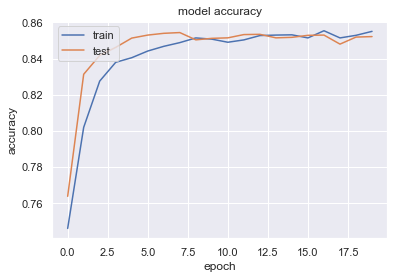

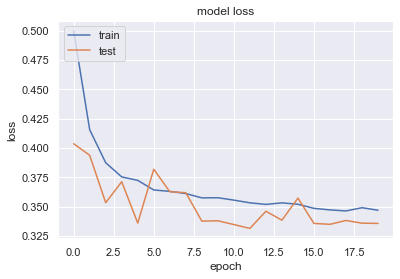

In [240]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Analysis

From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.
From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch
This suggest that the overfitting problem is solved. Although the accuracy is not increased much for the test data compare to previous one, it can be if no. of epochs are set high. 




# Model 3

In [241]:
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout
model = Sequential()
x=model.add(Dense(104, input_dim=104, activation='relu'))

model.add(Dense(30))
from keras.layers import LeakyReLU

# instead of cnn_model.add(Activation('relu'))
# use
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(40))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(40))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(30))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(40))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(40))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(40))
model.add(LeakyReLU(alpha=0.1))





model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

result=model.fit(X_train, y_train,validation_split=0.33,epochs=10)


Train on 14616 samples, validate on 7199 samples
Epoch 1/10
14616/14616 [==============================] - 1s 61us/step - loss: 0.1207 - accuracy: 0.8242 - val_loss: 0.1074 - val_accuracy: 0.8458
Epoch 2/10
14616/14616 [==============================] - 1s 50us/step - loss: 0.1031 - accuracy: 0.8523 - val_loss: 0.1026 - val_accuracy: 0.8523
Epoch 3/10
14616/14616 [==============================] - 1s 49us/step - loss: 0.0987 - accuracy: 0.8600 - val_loss: 0.1019 - val_accuracy: 0.8516
Epoch 4/10
14616/14616 [==============================] - 1s 51us/step - loss: 0.0962 - accuracy: 0.8628 - val_loss: 0.1022 - val_accuracy: 0.8551
Epoch 5/10
14616/14616 [==============================] - 1s 51us/step - loss: 0.0944 - accuracy: 0.8656 - val_loss: 0.1020 - val_accuracy: 0.8537
Epoch 6/10
14616/14616 [==============================] - 1s 50us/step - loss: 0.0918 - accuracy: 0.8708 - val_loss: 0.1040 - val_accuracy: 0.8501
Epoch 7/10
14616/14616 [==============================] - 1s 50us/ste

In [242]:
model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_239 (Dense)            (None, 104)               10920     
_________________________________________________________________
dense_240 (Dense)            (None, 30)                3150      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 30)                0         
_________________________________________________________________
dense_241 (Dense)            (None, 40)                1240      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 40)                0         
_________________________________________________________________
dense_242 (Dense)            (None, 40)                1640      
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 40)              

# Explanation of Code:

Model 3 is similar to Model 1 but the major difference is using Leaky ReLU as the activation function.The non-differentiability at zero problem can be solved by allowing a small value to flow when the input is less than or equal to 0, which thus overcomes the “Dying ReLU” problem. It has proved to give better results for some problems. Also the loss used is mean-square-error.

# Results

In [243]:
print("Accuracy of model 1")
print(result.history['accuracy'][-1] * 100)

Accuracy of model 1
87.82156705856323


In [244]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.109280538448016
Test accuracy: 0.8473708629608154


# Plots

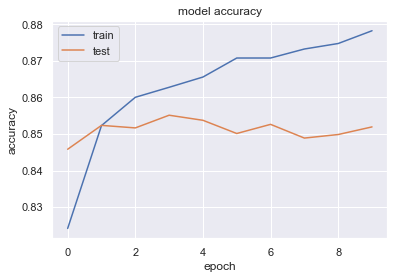

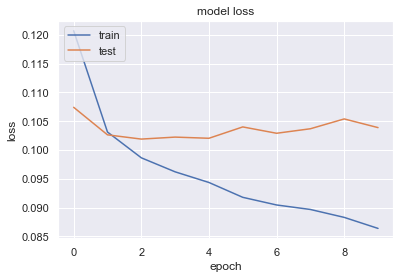

In [245]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [246]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 70.44936609268188 seconds ---


# Analysis

Model 3 performs in better than Model 1 but not as good as Model 2. The models seems to overfit after epoch 6. this evident from test and train accuracy as train accuracy is more than test. 


# Discuss about the choice of network structures and performance of it as you change the structures.


In this assignment I have tried to implement three different neural network structures by making an inital model and then creating 2 more models by changing its parameters like activation function, no. of hidden units, optimizer,etc. 

From the above analysis, the performance is evident , Model 2 >Model 3> Model 1. Model 2 also uses least hidden nodes in its layers thus computation required is less than other two. Thus, by properly selecting the model tuning parameters and type of layers, higher accuracy can be achieved. 






# What do you think about the results?

The results of the 3 models are not highly distinguishable. But the reason why I choose model 2 to be the best is that it beats overfitting and thus there is scope to increase no. of epochs and achieve higher accuracy. Also, Leaky Relu performs better for this dataset than 'relu' so if 'Leaky Relu ' is applied to Model 2, may be model 2 can yeild more accurate predictions. 
Overall, deep neural network is fiiting this dataset well compare to linear, non-linear classifires and 2-layer Neural Networks. 
As the results are highly dependent upon the choice of parameters, cross-validation should be employed in choosing the right set of parameters for the model. This would give the right combination and thus better predivction

# Conclusions

This assignment was helpful in getting a deeper understanding in Deep Learning. Also, I learned about the different deep learning structures and their importance. The main challenge was to decide upon the structures and the combination of parameters. 


# Extra Credit

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 


I have implemented the same code on Google Collab and I have got the following result:
https://colab.research.google.com/drive/1P3lFRBHM4arMJUs5GdKyver9lgn_rGuA#scrollTo=Ls-yHQPEcDWj


Jupyter Runtime
70.449

Google Colab Runtime
50.662